We need to return the derivatives of position and velocity for a satellite because we are using ordinary differential equations (ODEs) to model the motion of the satellites. ODEs are equations that relate a function and its derivatives. Solving the ODEs for satellites means finding the function that describes their position and velocity over time, given their initial conditions and the gravitational force. This is relevant because it allows us to simulate how the satellites move around the Earth and how close they get to each other.

- Import the necessary libraries for numerical computing, plotting, and logistic regression
- Define some constants related to the Earth and gravity
- Define the initial conditions for two satellites using position and velocity vectors
- Define a function that returns the derivatives of position and velocity for a satellite, based on the gravitational force
- Define a time span and a step size for the simulation
- Solve the ODEs for both satellites using scipy, which returns their positions and velocities at each time step
- Extract the positions and distances of satellites from the solutions
- Define a threshold for collision risk based on distance
- Define a function that checks if two spheres intersect given their positions and radii
- Define the radii of the satellites (assumed to be spherical)
- Initialize an array to store the collision status of satellites (True or False)
- Loop over time steps and check for collisions between satellites using the intersect function
- Plot the orbits of the satellites in 3D using matplotlib
- Plot the distance and risk over time using matplotlib
- Fit a logistic regression model to predict the probability of collision using sklearn
- Plot the probability of collision over time using matplotlib

In [31]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define constants
G = 6.674e-11 # Gravitational constant
M = 5.972e24 # Earth mass
R = 6371e3 # Earth radius
mu = G * M # Earth gravitational parameter

# Define initial conditions for two satellites using position and velocity vectors
#r1 = np.array([R + 500e3, 0, 0]) # Position of satellite 1
#v1 = np.array([0, np.sqrt(mu / (R + 500e3)), 0]) # Velocity of satellite 1
#r2 = np.array([R + 600e3, 0, 0]) # Position of satellite 2
#v2 = np.array([0, np.sqrt(mu / (R + 600e3)), 0]) # Velocity of satellite 2

In [98]:
# Define initial conditions for two satellites using position and velocity vectors
"""
This will make the satellites start at the same altitude but opposite velocities, and they will eventually collide after some time. 
You can check the collision array and see that it has some True values. You can also plot the orbits and see that they intersect.
"""
# Define initial conditions for two satellites using position and velocity vectors
#r1 = np.array([R + 500e3, 0, 0]) # Position of satellite 1
#v1 = np.array([0, np.sqrt(mu / (R + 500e3)), 0]) # Velocity of satellite 1
#r2 = np.array([R + 500e3, 1000, 0]) # Position of satellite 2
#v2 = np.array([0, -np.sqrt(mu / (R + 500e3)), 0])  # Velocity of satellite 2

#This will make satellite 2 start at the same position as satellite 1, but with a slightly higher speed. This will cause them to collide twice in one hour
#r2 = np.array([R + 500e3, 0, 0]) # Position of satellite 2 
#v2 = np.array([0, np.sqrt(mu / (R + 500e3)) * 1.01, 0]) # Velocity of satellite 2

#This will make satellite 2 start at the same position as satellite 1, but with a much higher speed.
#r2 = np.array([R + 500e3, 0, 0]) # Position of satellite 2 
#v2 = np.array([0, np.sqrt(mu / (R + 500e3)) * 1.05, 0]) # Velocity of satellite 2

#This will make satellite 2 start at the same position as satellite 1, but with a much higher speed.
#r2 = np.array([R + 500e3, 0, 0]) # Position of satellite 2 
#v2 = np.array([0, np.sqrt(mu / (R + 500e3)) * 1.1, 0]) # Velocity of satellite 2 



r1 = np.array([R + 500e3, 0, 0]) # Position of satellite 1 
v1 = np.array([0, np.sqrt(mu / (R + 500e3)), 0]) # Velocity of satellite 1 
r2 = np.array([R + 500e3, 0, 0]) # Position of satellite 2 
v2 = np.array([0, -np.sqrt(mu / (R + 500e3)), 0]) # Velocity of satellite 2

In [99]:
# Define a function that returns the derivatives of position and velocity for a satellite
def ode(t, y):
    # Unpack the state vector y
    x, y, z, vx, vy, vz = y
    
    # Calculate the distance from the center of the Earth
    r = np.sqrt(x**2 + y**2 + z**2)
    
    # Calculate the acceleration due to gravity
    ax = -mu * x / r**3
    ay = -mu * y / r**3
    az = -mu * z / r**3
    
    # Return the derivatives of position and velocity
    return [vx, vy, vz, ax, ay, az]

# Define time span and step size for simulation
t_span = [0, 3600*10] # One hour in seconds
dt = 10 # Ten seconds per step

# Solve the ODEs for both satellites using scipy
sol1 = solve_ivp(ode, t_span, np.concatenate((r1, v1)), t_eval=np.arange(0, t_span[1], dt))
sol2 = solve_ivp(ode, t_span, np.concatenate((r2, v2)), t_eval=np.arange(0, t_span[1], dt))

In [100]:
# Extract the positions and distances of satellites from the solutions
pos1 = sol1.y[:3].T # Position of satellite 1
pos2 = sol2.y[:3].T # Position of satellite 2
dist = np.linalg.norm(pos1 - pos2, axis=1) # Distance between satellites

# Define a threshold for collision risk based on distance
threshold = 1000 # One kilometer in meters

# Define a function that checks if two spheres intersect given their positions and radii
def intersect(p1, p2, r1, r2):
    # Calculate the distance between the centers of the spheres
    d = np.linalg.norm(p1 - p2)
    
    # Check if the distance is less than or equal to the sum of the radii
    return d <= r1 + r2

# Define the radii of the satellites (assumed to be spherical)
r_sat1 = 200 # Ten meters for satellite 1
r_sat2 = 200 # Ten meters for satellite 2

# Initialize an array to store the collision status of satellites (True or False)
collision = np.zeros(t_span[1] // dt, dtype=bool)

# Loop over time steps and check for collisions between satellites
for i in range(t_span[1] // dt):
    collision[i] = intersect(pos1[i], pos2[i], r_sat1, r_sat2)

In [101]:
collision

array([ True, False, False, ..., False, False, False])

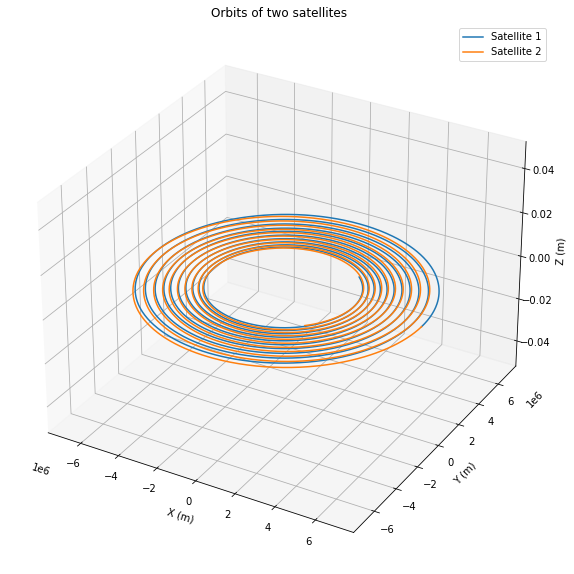

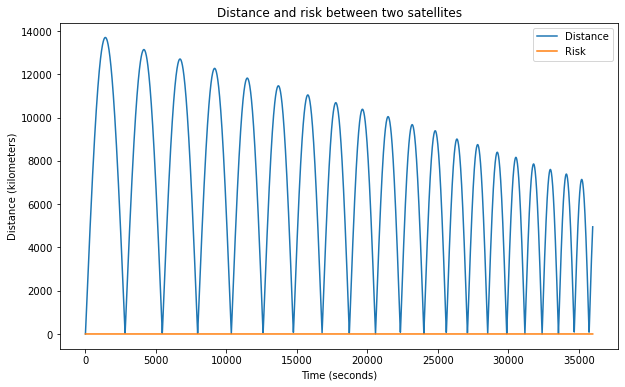

In [102]:
# Plot the orbits of the satellites in 3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(pos1[:,0], pos1[:,1], pos1[:,2], label="Satellite 1")
ax.plot(pos2[:,0], pos2[:,1], pos2[:,2], label="Satellite 2")
ax.set_xlabel("X (m)")
ax.set_ylabel("Y (m)")
ax.set_zlabel("Z (m)")
ax.set_title("Orbits of two satellites")
ax.legend()
plt.show()

# Plot the distance and risk over time
plt.figure(figsize=(10,6))
plt.plot(np.arange(0, t_span[1], dt), dist / 1000,
         label="Distance")
plt.plot(np.arange(0, t_span[1], dt), collision * threshold / 1000,
         label="Risk")
plt.xlabel("Time (seconds)")
plt.ylabel("Distance (kilometers)")
plt.title("Distance and risk between two satellites")
plt.legend()
plt.show()

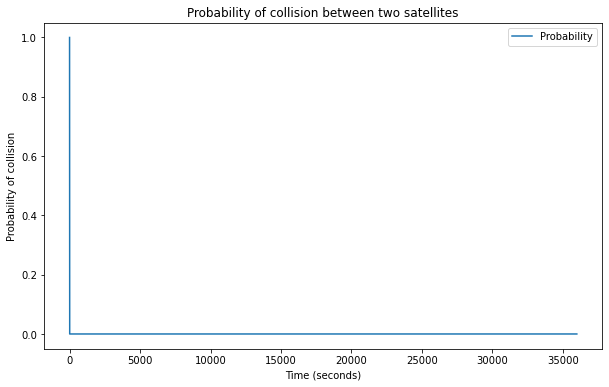

In [103]:
# Fit a logistic regression model to predict the probability of collision
X = dist.reshape(-1, 1) # Reshape the distance array to a column vector
y = collision # Use the collision array as the target variable
model = LogisticRegression() # Create a logistic regression object
model.fit(X, y) # Fit the model to the data

# Plot the probability of collision over time
plt.figure(figsize=(10,6))
plt.plot(np.arange(0, t_span[1], dt), model.predict_proba(X)[:, 1],
         label="Probability")
plt.xlabel("Time (seconds)")
plt.ylabel("Probability of collision")
plt.title("Probability of collision between two satellites")
plt.legend()
plt.show()

Model accuracy: 1.00


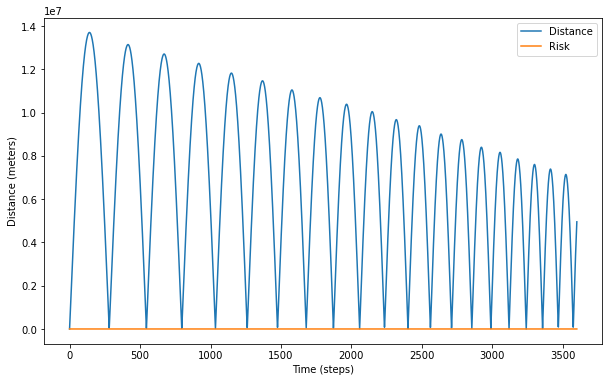

In [104]:
# Define a threshold for collision risk based on distance
threshold = 1000 # One kilometer in meters

# Label the distance data as high-risk (1) or low-risk (0) based on threshold
y = np.where(dist < threshold, 1, 0)

# Create a feature matrix X with time and distance as features
X = np.column_stack((np.arange(t_span[1] // dt), dist))

# Split the data into training and testing sets (80/20 split)
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Train a logistic regression model on the training data
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict the risk labels on the testing data
y_pred = model.predict(X_test)

# Evaluate the model accuracy on the testing data
accuracy = np.mean(y_pred == y_test)
print(f"Model accuracy: {accuracy:.2f}")

# Plot the distance and risk over time
plt.figure(figsize=(10,6))
plt.plot(X[:,0], dist, label="Distance")
plt.plot(X[:,0], y * threshold, label="Risk")
plt.xlabel("Time (steps)")
plt.ylabel("Distance (meters)")
plt.legend()
plt.show()